# Logistic Regression

## Contents

* Introduction
* Algorithm
* Application on dataset
    * Data Visualization
    * Modeling and Test Model
* Error Analysis


### Introduction

Logistic regression is defined as a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. This article explains the fundamentals of logistic regression, its mathematical equation and assumptions, types, and best practices for 2022.

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

For example,

* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

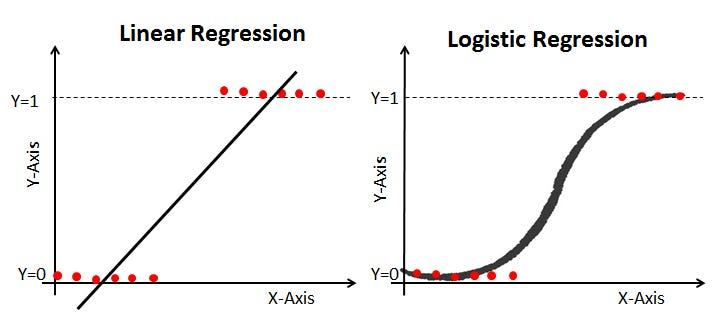

## Algorithm

The logistic function is of the form:

$p(x)=\frac{1}{1+e^{-(x-\mu)/s}}$

where μ is a location parameter (the midpoint of the curve, where $p(\mu) = 1/2$
and s is a scale parameter. This expression may be rewritten as:

$p(x)=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$

The usual measure of goodness of fit for a logistic regression uses logistic loss (or log loss), the negative log-likelihood. For a given $x_{k}$ and  $y_{k}$, write 

$p_{k} = p(x_{k})$. The 
$p_{k}$ are the probabilities that the corresponding 
$y_{k}$ will be unity and $1-p_{k}$
are the probabilities that they will be zero . We wish to find the values of 
$\beta _{0}$ and 
$\beta _{1}$ which give the "best fit" to the data. 


Sigmoid function:

$S(t)= \frac{1}{1+e^{-t}}$







### Advantages:



1 Logistic regression is easier to implement, interpret, and very efficient to train.

2 It makes no assumptions about distributions of classes in feature space.

3 It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.

4 It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).

5 Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.

6 Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.One may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios.

### Disadvantages:

1 If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

2 The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

3 It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.

4 Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios.

5 Logistic Regression requires average or no multicollinearity between independent variables.

6 It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.


### Application On Dataset

In [31]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Prepare Data

In [32]:
df = pd.read_csv("/Users/liusiling/Desktop/Heart-Disease-Prediction/heart disease classification dataset.csv") 
df.shape

(303, 15)

In [5]:
for i in range(0,len(df),1):
    if df['sex'][i]=='male':
        df['sex'][i]=1
    if df['sex'][i]=='female':
        df['sex'][i]=0
        
    if df['target'][i]=='yes':
        df['target'][i]=1
    if df['target'][i]=='no':
        df['target'][i]=0

/var/folders/sf/smhqk9hx489bblvt_p7gst_w0000gn/T/ipykernel_18264/61562326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][i]=1
/var/folders/sf/smhqk9hx489bblvt_p7gst_w0000gn/T/ipykernel_18264/61562326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][i]=1
/var/folders/sf/smhqk9hx489bblvt_p7gst_w0000gn/T/ipykernel_18264/61562326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][i]=0
/var/folders/

In [6]:
df = df.dropna(axis=0)

In [7]:
df.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1
6,6,56,0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,1
7,7,44,1,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,1
8,8,52,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1
9,9,57,1,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,1
10,10,54,1,0,140.0,239.0,0,1,160.0,0,1.2,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  293 non-null    int64  
 1   age         293 non-null    int64  
 2   sex         293 non-null    object 
 3   cp          293 non-null    int64  
 4   trestbps    293 non-null    float64
 5   chol        293 non-null    float64
 6   fbs         293 non-null    int64  
 7   restecg     293 non-null    int64  
 8   thalach     293 non-null    float64
 9   exang       293 non-null    int64  
 10  oldpeak     293 non-null    float64
 11  slope       293 non-null    int64  
 12  ca          293 non-null    int64  
 13  thal        293 non-null    int64  
 14  target      293 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 36.6+ KB


In [9]:
df['sex'] = df['sex'].astype(dtype='int')
df['target'] = df['target'].astype(dtype='int')    

In [10]:
df.isna().count()

Unnamed: 0    293
age           293
sex           293
cp            293
trestbps      293
chol          293
fbs           293
restecg       293
thalach       293
exang         293
oldpeak       293
slope         293
ca            293
thal          293
target        293
dtype: int64

In [11]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.546075
0    0.453925
Name: target, dtype: float64

<AxesSubplot:>

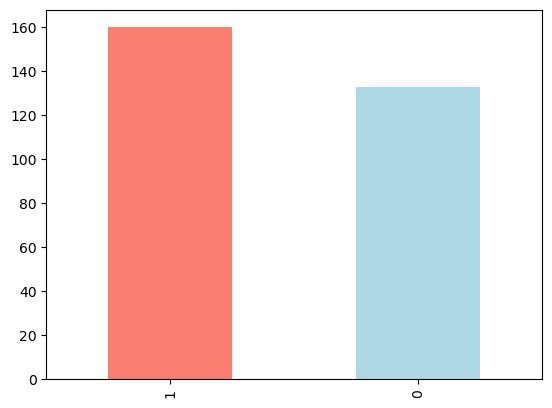

In [29]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [13]:
df.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,150.877133,54.348123,0.689420,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,1.054266,1.392491,0.730375,2.320819,0.546075
std,86.860137,9.182042,0.463523,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.173169,0.618946,1.029862,0.613331,0.498724
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.000000,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Gender

In [14]:
df.sex.value_counts()

1    202
0     91
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,23,110
1,68,92


## Modeling

In [16]:
X = df.drop("target", axis=1)

y = df.target.values

In [17]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2) 

In [28]:
model = LogisticRegression()

model.fit(X_train, y_train)

/Users/liusiling/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Test the Model

In [27]:
model.score(X_test, y_test)

/Users/liusiling/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

Model F1 Score: 0.99
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.97      1.00      0.99        34

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



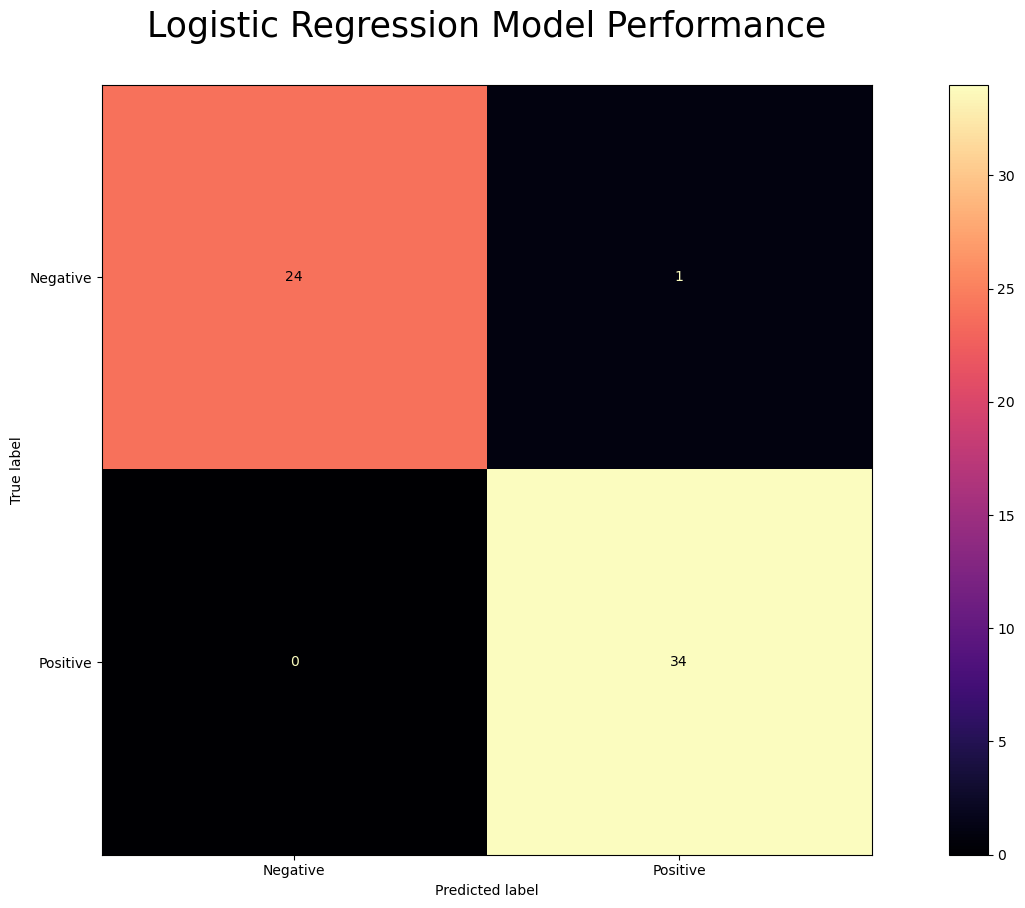

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_hat = model.predict(X_test)

print(f"Model F1 Score: {np.round(f1_score(y_test, y_hat),2)}")

labels = ['test1', 'test2']
displabels = ['Negative', 'Positive']

fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.set_title('Logistic Regression Model Performance\n', fontsize = 25)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels = displabels, cmap = 'magma', colorbar=True, ax=ax)

print(classification_report(y_test, y_hat))

## Classification report

A classification report will also give us information of the precision and recall of our model for each class.

In [21]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.97      1.00      0.99        34

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



This prediction is very accurate!

## Error Analysis

In [25]:
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.02
Sum Squared Error: 1
Sum Squared Total: 14.41
R^2: 0.93
